In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("salary.csv")

In [3]:
df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [4]:
df.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


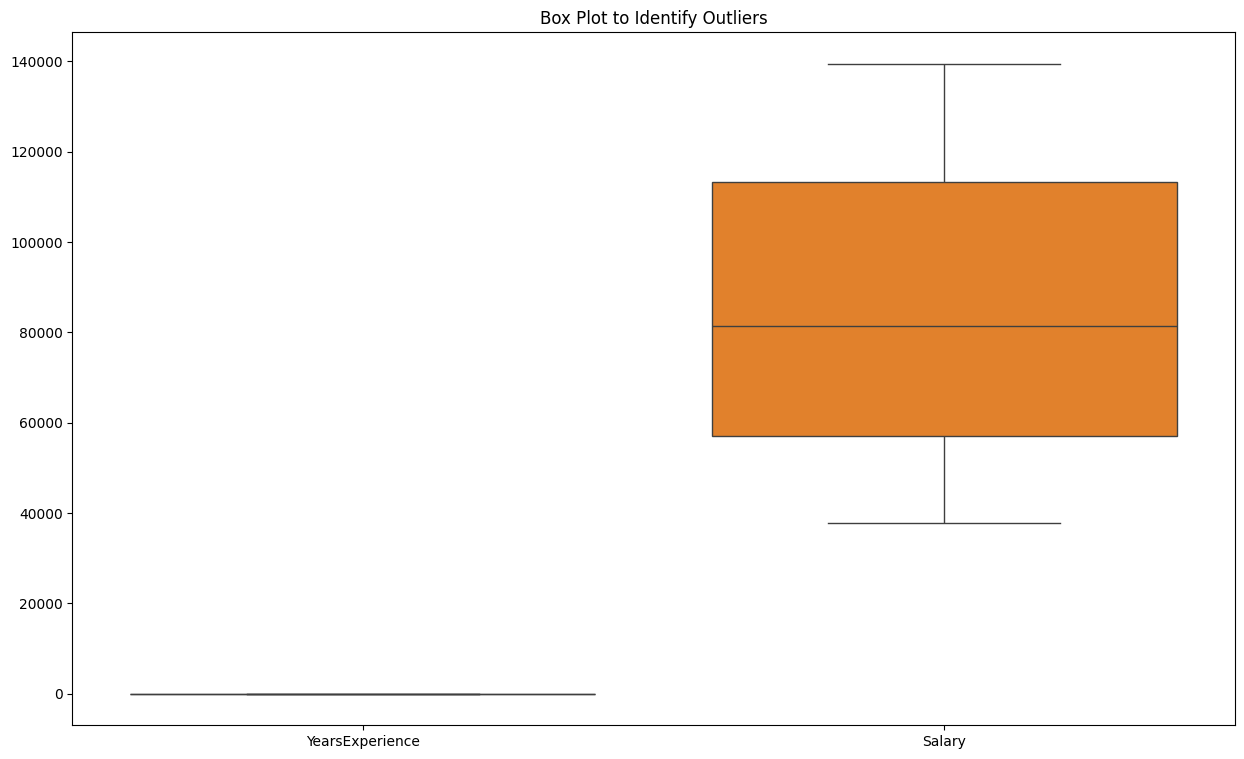

In [5]:
plt.figure(figsize=(15, 9))
sns.boxplot(df)

plt.title('Box Plot to Identify Outliers')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [7]:
X = df[['YearsExperience']]
y = df['Salary']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [9]:
model = LinearRegression()

In [10]:
model.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred = model.predict(X_test)

In [12]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 16561691.220974546


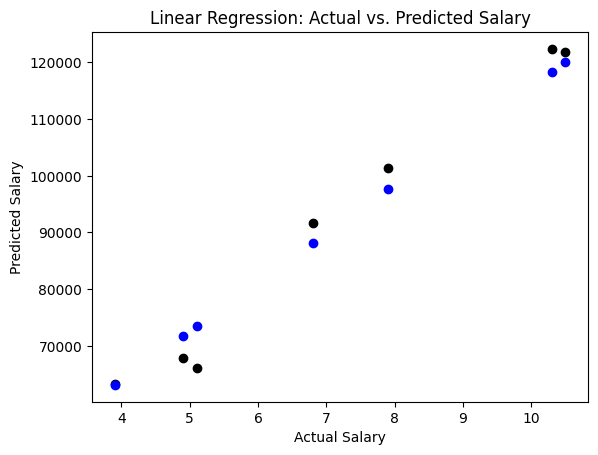

In [13]:
plt.scatter(X_test['YearsExperience'], y_test ,color = "black")
plt.scatter(X_test['YearsExperience'], y_pred ,color = "blue")
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Linear Regression: Actual vs. Predicted Salary')
plt.show()

In [14]:
result_df = pd.DataFrame({'YearsExperience': X_test['YearsExperience'], 'Actual': y_test, 'Predicted': y_pred})

In [15]:
result_df

,YearsExperience,Actual,Predicted
29,10.5,121872,120057.876725
20,6.8,91738,88127.644843
16,5.1,66029,73456.997762
28,10.3,122391,118331.918245
22,7.9,101302,97620.416484
15,4.9,67938,71731.039282
10,3.9,63218,63101.246882


In [16]:
result_df.mean()

YearsExperience        7.057143
Actual             90641.142857
Predicted          90346.734318
dtype: float64

In [19]:
# err_percent=(result_df["Actual"].mean()-result_df["Predicted"].mean())/2/100
# err_percent
if result_df["Actual"].mean() >= result_df["Predicted"].mean():
    acc = result_df["Predicted"].mean()/result_df["Actual"].mean() *100
    print(acc)

else:
    acc = result_df["Actual"].mean()/result_df["Predicted"].mean() *100
    print(acc)

99.67519326178956


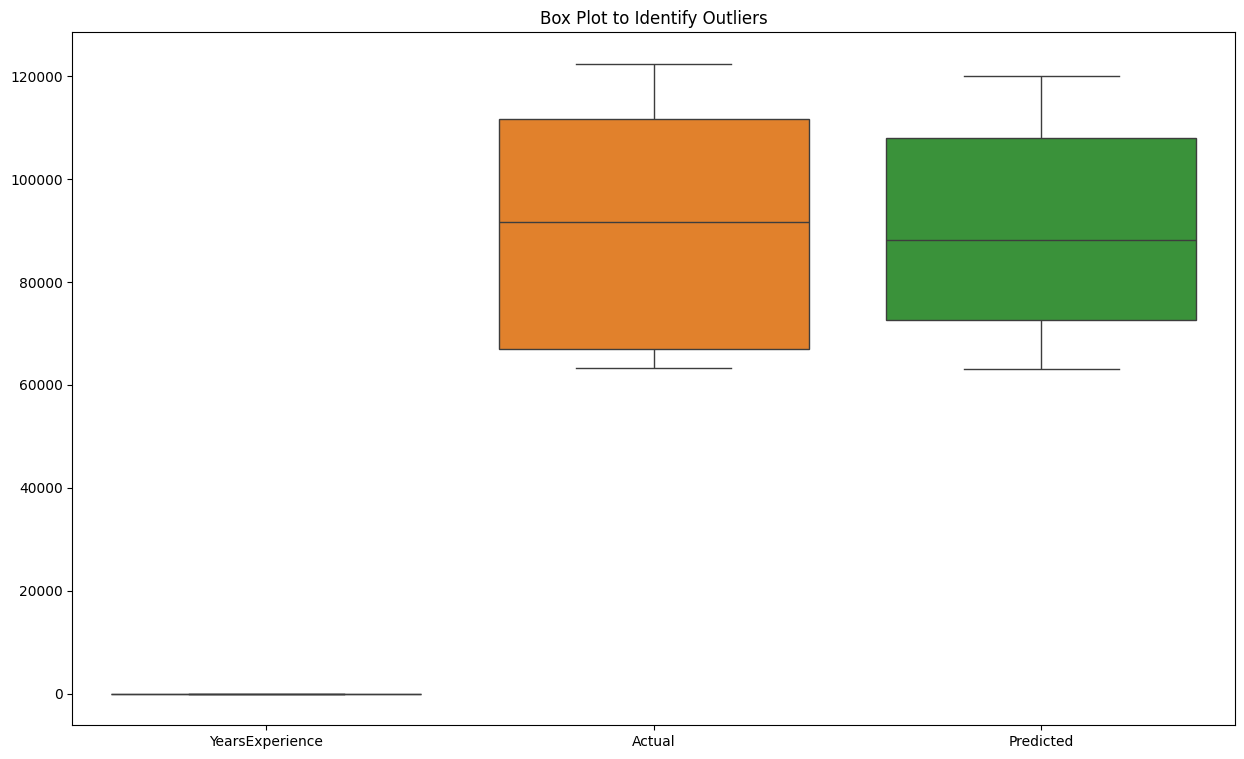

In [20]:
plt.figure(figsize=(15, 9))
sns.boxplot(result_df)

plt.title('Box Plot to Identify Outliers')
plt.show()